In [9]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
    include("/home/sergey/work/repo/dynamical-systems/system.jl")
end

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


FHN2_try3_params (generic function with 1 method)

In [10]:
using JLD2, CairoMakie, MAT

In [18]:
cd("/home/sergey/work/repo/dynamical-systems/brain rhythms")
len = 100
Λs = load("/home/sergey/work/repo/dynamical-systems/brain rhythms/LSE 100x100  γY II rate_model params from tg RK4.jld2")
Λs = Λs["Λs"]
γYrange = range( 0.0, 10.0, length = len );
IErange = range(0.0, 2.0, length = len);

In [19]:
cd("/home/sergey/MEGA/MatCont7p4/Systems/rate_model/diagram")
Hopf_back = matopen("GammaY_II_hopf_backward.mat")
Hopf_back = read(Hopf_back, "x")
Hopf_forward = matopen("GammaY_II_hopf_forward.mat")
Hopf_forward = read(Hopf_forward, "x")

8×158 Matrix{Float64}:
 0.197651     0.197652    0.197652     …   0.198949      0.198956
 0.488979     0.488984    0.488991         0.530801      0.530983
 0.00513989   0.00513924  0.00513838       0.00185424    0.00184607
 0.0951474    0.0951497   0.0951526        0.11477       0.114863
 7.39891e-18  7.399e-18   7.39911e-18      8.42366e-18   8.42961e-18
 0.42821      0.428231    0.428257     …   0.589077      0.589771
 5.00257      5.00357     5.00487         19.173        19.273
 0.0946873    0.094688    0.0946889        0.0998176     0.0998377

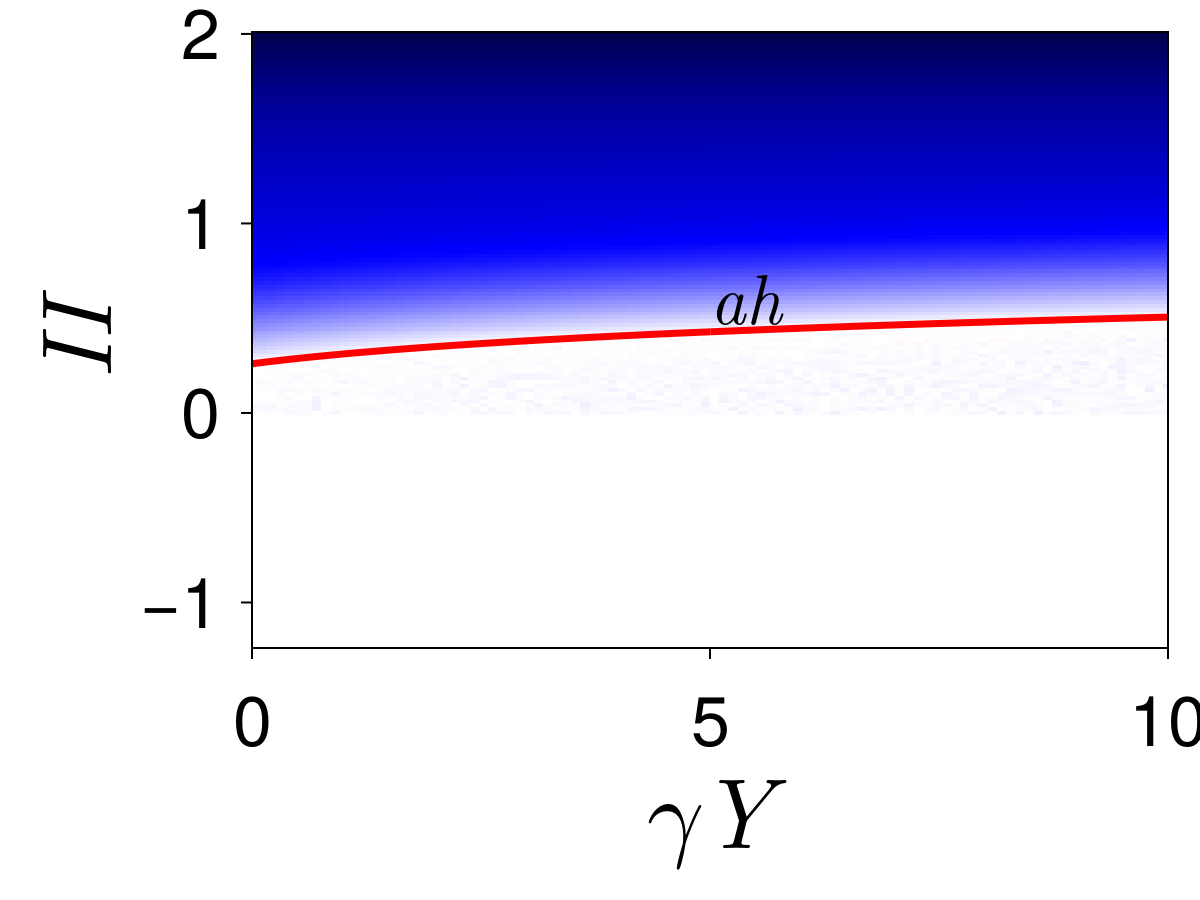

In [22]:
index = 1
absmax = maximum(abs.(Λs[:, :, index]))

mn, mx =  -absmax, absmax

CairoMakie.activate!()
f = Figure()
ticksize = 35
tickpad = 10.0
textsize = 30
textsizecurve = 35
lw = 3.5
mksize = 12

ax = Axis(f[1, 1], xlabel = L"γY",ylabel = L"II", xlabelsize = 50, ylabelsize = 50,
            xticklabelsize = ticksize, yticklabelsize = ticksize,
            xgridvisible  = false, ygridvisible = false,
            xticklabelpad = tickpad, yticklabelpad = tickpad)

hm = heatmap!(ax, γYrange, IErange, Λs[:, :, index], colormap = :seismic, colorrange = (mn, mx))

lines!(ax, Hopf_back[7, :], Hopf_back[6, :], color = :red, linewidth = lw)
text!(ax, 5.0, 0.4, text = L"ah", fontsize = ticksize)
lines!(ax, Hopf_forward[7, :], Hopf_forward[6, :], color = :red, linewidth = lw)
xlims!(0.0, 10.0)
display(f);

In [24]:
pathtosave = "/home/sergey/MEGA/dynamical-systems/rate_model/images/maps/"
filename = "gammaY_II_params_from_tg_RK4.eps"
fullpath = pathtosave * filename 
save(fullpath, f)

CairoMakie.Screen{EPS}
